# Visualising modes
In this example, we use a simple approach to search for the modes of a split ring resonator, and visualise the corresponding current and charge distribution. These modes exist at complex frequencies (ie. values of $s$ with nonzero real parts), and are found using iterative search techniques

In [1]:
# the numpy library contains useful mathematical functions
import numpy as np

# function to display images from disk
from IPython.display import Image, display

# import useful python libraries
import os.path as osp
import os

# import the openmodes packages
import openmodes

# setup 2D and 3D plotting 
%matplotlib inline
from openmodes.ipython import init_3d, matplotlib_defaults
init_3d()
matplotlib_defaults()
import matplotlib.pyplot as plt


## Setup simulation

First we load the geometry of a split ring from a file. Note how the geometric parameter `inner_radius` has been overriden to make the ring is slightly wider than in the previous example, for nicer plots.

In [2]:
sim = openmodes.Simulation(name='example2')
mesh = sim.load_mesh(osp.join(openmodes.geometry_dir, "SRR.geo"), parameters={'inner_radius': 2.5e-3}, mesh_tol=0.5e-3)
ring = sim.place_part(mesh)

## Search for modes
Now we ask OpenModes to find the values of the complex frequency parameter `s` for which the system becomes singular. This is how we find the modes of the system, using an iterative search. Note that we need to specify a frequency at which to perform some intial estimations. The choice of this frequency is not too critical, but it should be somewhere in the frequency range of interest. Here we will calculate the 4 lowest order modes.

Notice that this is a 3 step process. First estimates are given for the location of the modes. Then they are iteratively refined. Finally, the complex conjugate modes are added (at negative $\omega$), as required for any physically realisable resonator.

In [3]:
start_freq = 2e9
start_s = 2j*np.pi*start_freq

num_modes = 4
estimates = sim.estimate_poles(start_s, modes=num_modes, cauchy_integral=False)
refined = sim.refine_poles(estimates)
modes = refined.add_conjugates()

Let us now plot the location of the modes in the complex s plane. The frequency of each mode is represented by their position on the $j\omega$ axis, while the $\Omega$ axis gives the damping, which is related to the width of the resonance.

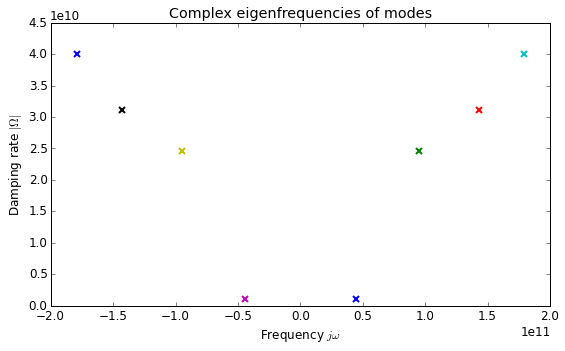

In [4]:
plt.figure()
plt.plot(modes.s.imag, np.abs(modes.s.real), 'x')
plt.xlabel('Frequency $j\omega$')
plt.ylabel('Damping rate $|\Omega|$')
plt.title('Complex eigenfrequencies of modes')
plt.tight_layout()
plt.show()

We can find the computed values of the resonant frequencies in Hz by looking at the imaginary parts of the singular points. For this particular geometry, we see that these split rings resonate in the GHz frequency range. Note that the lowest order modes will be most accurately represented, whereas for higher order modes the mesh cells are larger relative to the wavelength. If in doubt, repeat the calculation for smaller mesh tolerance and see how much the values change.

In [5]:
print(refined.s.imag/2/np.pi)

[[  7.07140019e+09   1.50685534e+10   2.27611036e+10   2.85072417e+10]]


## Plot the mode currents and charges

As well as calculating the frequencies of the modes, we can also plot the corresponding surface currents and charges. The easiest way to view this calculated solution is with the the 3D interactive web-based plots that openmodes produces.

**Use the mouse to navigate the plots. The left button rotates the view, the right button pans, and the scroll wheel zooms in and out. If you have problems viewing the output, please make sure that your web browser and graphics drivers are up to date.**

As current and charge are complex quantities, you can view their real and imaginary parts, and for the charge also the magnitude and phase.

In [6]:
for mode in range(num_modes):
    sim.plot_3d(solution=refined.vr["J", :, 'modes', mode], width=400, height=400)

The colour plot shows the charge distribution, with reds representing positive charge, and blues representing negative. We see that the higher order modes have more strongly varying charge distributions, as we would expect. The arrows show the corresponding flow of surface current, which changes direction more often for higher order modes.

By default these plots show only the _real_ parts of the solution. The imaginary parts of charge and current always exist, and can be seen by changing the format drop-box.